# Text-Analyzer (TA) : TextAnalyzer is a class I wrote for the final project in my Python Developer program. It reads text files or pulls text from specified HTML tags and conducts data analysis on characters, words, and certain types of words, such as palindromes.

In [1]:
import requests, re
from bs4 import BeautifulSoup

In [2]:
from collections import Counter
import statistics as stats
import string

import string
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
import builtins
%matplotlib inline

class TextAnalyzer(builtins.object):
    '''Creates a object for analyzing text'''
    def __init__(self, src, src_type='discover'):
        self.src = src
        '''Keyword arguments for _init_ methods: 
        src = represents what was passed in; 
        src_type = the type of file passed in (e.g text or url):
        _content = the content of the file;
        -orig_content = the orginal content after changes to _content
        '''
        if self.src.startswith('http'):
            self._src_type = 'url'
        elif self.src.endswith('txt'):
            self._src_type = 'path'
            self._content = open(src,'r').read().strip().replace('\n',' ')
            self._orig_content = open(src,'r').read().strip().replace('\n',' ')
        else:
            self._src_type = 'text'
            self._content = src
            self._orig_content = src
            
    def set_content_to_tag(self, tag, tag_id=None):
        '''This method uses BS4 to set _content equal to the text
        pulled from a specified HTML tag. The method works likes this: 
         1. Soup = This object is the request using BS4 to pull the text if a URL is passed in
         2. soup_text = This object holds the text from the request
         3. self._content = This object is structured to find a specific
         tag id that is passed in
         4. self._orig_content = This object holds the original text
         from the specified HTML tag id'''
        self.tag = tag
        self.tag_id = tag_id
        soup = requests.get(self.src)
        soup_text = BeautifulSoup(soup.text)
        self._content = soup_text.find(tag, attrs={'id':tag_id}).text
        self._orig_content = str(soup_text.find(tag, attrs={'id':tag_id}))
    
    def reset_content(self):
        '''This method resets the text content back to the original
        text that is passed in by src in the __init__() method'''
        self._content = self._orig_content
    
    def _words(self, casesensitive=False):
        '''This method returns the words in _content as a list.
        self._words = This object splits the text in _content into a list
        words = This object uses list comprehension to remove punctuation
        self._content.upper() = This object convers all of the words 
        in the words list to uppercase if casesensitive = TRUE'''
        self._words = self._content.split()
        if casesensitive:
            self._words = [word.strip(string.punctuation) for word in self._words]
        else:
            self._words = [word.strip(string.punctuation).upper() for word in self._words]
        return self._words
    
    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        '''The common_words method creates a list of tuples that contain words from text in position[0]
        and the number of occurrences in position[1]. It can be modified to be 
        casesensitive or specific to word lengths (minimum & maximum).
        It runs using the following objects:
        1.) self_words = holds words from text split into a list of strings
        2.) counts = uses Counter from the collections module to create tuples
        of items from self._words and their occurences.'''
        
        self._words = self._content.split()
        self._words = [word.strip(string.punctuation) for word in self._words]
        if casesensitive:
            self._words = [word for word in self._words if len(word) in range(minlen,maxlen+1)]
        else:
            self._words = [word.upper() for word in self._words if len(word) in range(minlen,maxlen+1)]
        counts = Counter(self._words).most_common(count)
        return counts
        
    
    def char_distribution(self, casesensitive=False, letters_only=False):
        '''char_distribution returns a list of the characters found in the 
        text and their occurences as a tuple. The objects shown here are:
        
        1.) joined_content = holds the list items after a regular expression 
        has removed all non-word characters to plot letters
        
        2.) self.char_distribution = holds the joined_content object
        as a pandas series and sorts the character distribution 
        from most common to least
        '''
        if letters_only:
            joined_content = re.sub(r'[^\w\s]', "",self._content).replace('\n',' ').replace(' ','')
        else:
            joined_content = self._content.replace('\n',' ').replace(' ','')
        if casesensitive:
            self.char_distribution = pd.Series(Counter(joined_content.lower())).sort_values(ascending=False)
        else:
            self.char_distribution = pd.Series(Counter(joined_content)).sort_values(ascending=False)
        return list(zip(self.char_distribution.keys(),self.char_distribution.values))
        
    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        '''Method uses the plot method found in matplotlib to show a 
        graph of the common words.
        Keyword arguments:
        minlen (int) -- Minimum length of words to include.
        maxlen (int) -- Maximum length of words to include.
        count (int) -- Number of words to include.
        casesensitive (bool) -- If False makes all words uppercase'''
        
        words = self.common_words(minlen=minlen, maxlen=maxlen, count=count, casesensitive=casesensitive)
        df = pd.DataFrame(words)
        df.index = df[0]
        plot = df.plot(kind='bar',
                       title='Common Words',
                       legend=False,
                       figsize=(16,6),
                       width=.8,
                       fontsize=14)
        plot.plot()
        
        
    def plot_char_distribution(self, casesensitive=False, letters_only=False):
        """Plots character distribution

        Keyword arguments:
        casesensitive (bool) -- If False makes all words uppercase
        letters_only (bool) -- Exclude non-letters?
        """
        
        chars = self.char_distribution(casesensitive=casesensitive, letters_only=letters_only)
        df = pd.DataFrame(chars)
        df.index = df[0]
        plot = df.plot(kind='bar',
                    title='Character Distribution',
                    legend=False,
                    figsize=(16,6),
                    width=.8,
                    fontsize=14)
        plot.plot()
        
    @property
    def word_count(self):
        '''This method is a property of the Text Analyzer class
        that returns the number of words found in the text. Objects
        shown here: 
        
        1.) words = holds the list of words found in self._content as strings
        using the split function'''
        words = self._content.split()
        words = [word.strip(string.punctuation) for word in words]
        return len(words)
    
    @property
    def distinct_word_count(self):
        '''The distinct_word_count(dwc) method is a property that 
        identifies how many different words are in the text. 
        Objects found here: 
        1.) self_words = holds the list of words found in the self._content
        object as strings
        2.) dwc = holds the count of the unique words by relying
        on the set function to remove duplicates.'''
        self._words = self._content.split()
        self._words = [word.strip(string.punctuation).upper() for word in self._words]
        dwc = len(set(self._words))
        return dwc

    @property
    def avg_word_length(self):
        '''This method is a property that finds the average
        length of words in the text. The objects found here are:
        
        1.) self._words = list of words as strings from the 
        self._content object 
        2.)word_lengths = holds the results of a list comprehension
        that takes the length of the words found in the self._words object
        3.) n_words = holds the length of all items in self._words
        4.) avg_word_length = holds the the sum of the word_lengths
        divided by the n_words rounded to the nearest tenth'''
            
        self._words = self._content.split()
        self._words = [word.strip(string.punctuation) for word in self._words]
        word_lengths = [len(word) for word in self._words]
        n_words = len(self._words)
        avg_word_length = round(sum(word_lengths) / n_words,2)
        return avg_word_length
    
    @property
    def words(self):
        '''This method is a property that contains the words
        in the text. It contains a single object that remains 
        the same until a new text is found in the __init__ 
        method.'''
        words = self._content.split()
        return words
    
    @property
    def positivity(self):
        '''This is method is a property that generates a score for how 
        positive the text is. The score is generated based on a comparison
        to two text files that each contain positive and negative words.
        Objects found here are: 
        
        1.) tally = object that is incremented or decremented each time 
        the text contains a positive or negative word from the files.
        2.) pos = holds the text file with all positive words 
        3.) neg = holds the text file with all negative words
        4.) words = holds the results of a list comprehension 
        that converts all the words in self_words to uppercase 
        so that an equal comparison can be made. The loop then
        converts all the items in pos or neg to strings depending
        on the instance and increments or decrements the tally object
        accordingly. '''
        tally = 0
        pos = open('positive.txt','r').read().strip().replace('\n',' ').split(' ')
        neg = open('negative.txt',encoding='utf-8').read().strip().replace('\n',' ').split(' ')
        words = [i.upper() for i in self._words()]
        for word in words:
            if str(word) in pos:
                tally += 1
            elif str(word) in neg:
                tally -= 1
            else:
                tally += 0
        return round(tally / int(self.word_count) * 1000)

# TA Test Cells Below 

In [3]:
import unittest

url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''

class TestTextAnalyzer(unittest.TestCase):
    def test_discover_url(self):
        ta = TextAnalyzer(url)
        self.assertEqual(ta._src_type, 'url')
    def test_discover_path(self):
        ta = TextAnalyzer(path)
        self.assertEqual(ta._src_type, 'path')
    def test_discover_text(self):
        ta = TextAnalyzer(text)
        self.assertEqual(ta._src_type, 'text')
    def test_set_content_to_tag(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        self.assertEqual(ta._content[0:25], '\n\nAddress by Bill Clinton')
    def test_reset_content(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        ta.reset_content()
        self.assertEqual(ta._content[0], '<')
    def test_common_words(self):
        ta = TextAnalyzer(path, src_type='path')
        common_words = ta.common_words(minlen=5, maxlen=10)
        liz = common_words[0]
        self.assertEqual(liz[0],'ELIZABETH')
    def test_avg_word_length(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.avg_word_length, 4.16)
    def test_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.word_count, 45)
    def test_distinct_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.distinct_word_count, 38)
    def test_char_distribution(self):
        ta = TextAnalyzer(text, src_type='text')
        char_dist = ta.char_distribution(letters_only=True)
        self.assertEqual(char_dist[1][1], 20)
    def test_positivity(self):
        ta = TextAnalyzer(text, src_type='text')
        positivity = ta.positivity
        self.assertEqual(positivity, -44)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestTextAnalyzer)
unittest.TextTestRunner().run(suite)

...........
----------------------------------------------------------------------
Ran 11 tests in 0.630s

OK


<unittest.runner.TextTestResult run=11 errors=0 failures=0>

# Plots 

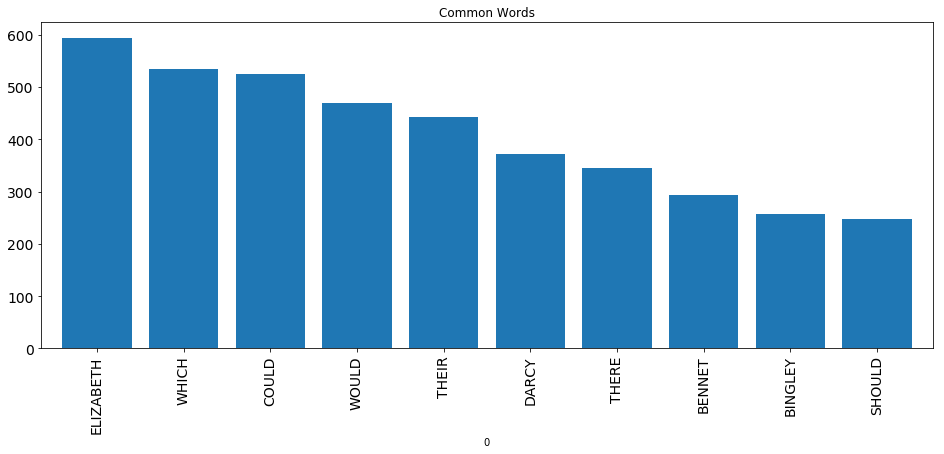

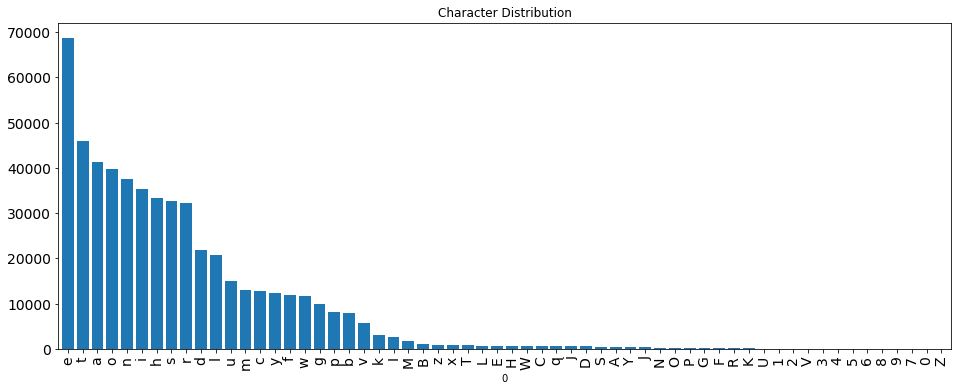

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
ta.plot_common_words(minlen=5)
ta.plot_char_distribution(letters_only=True)